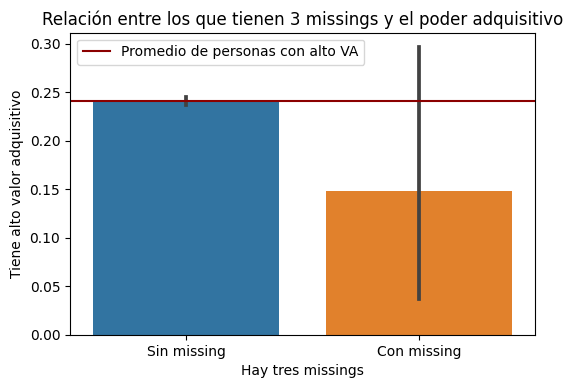

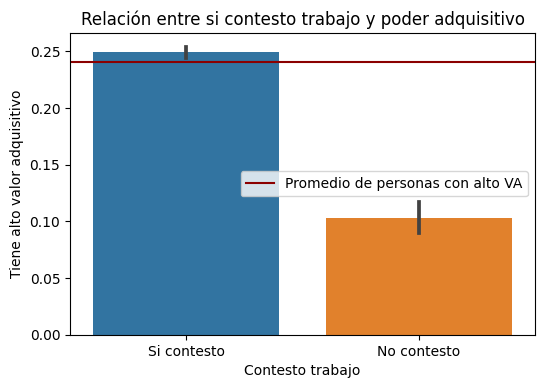

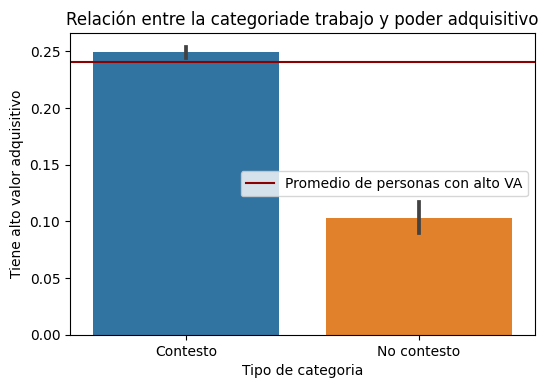

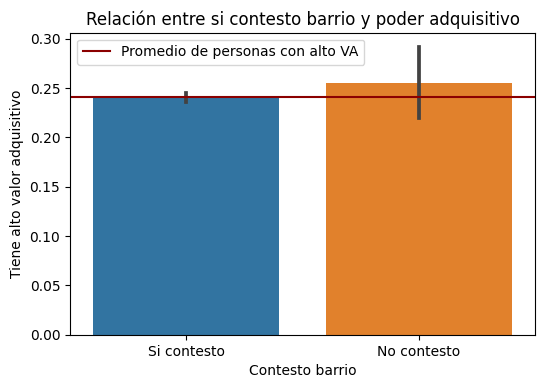

In [1]:
%run "../Secciones/feature_engineering.ipynb"

### trabajo

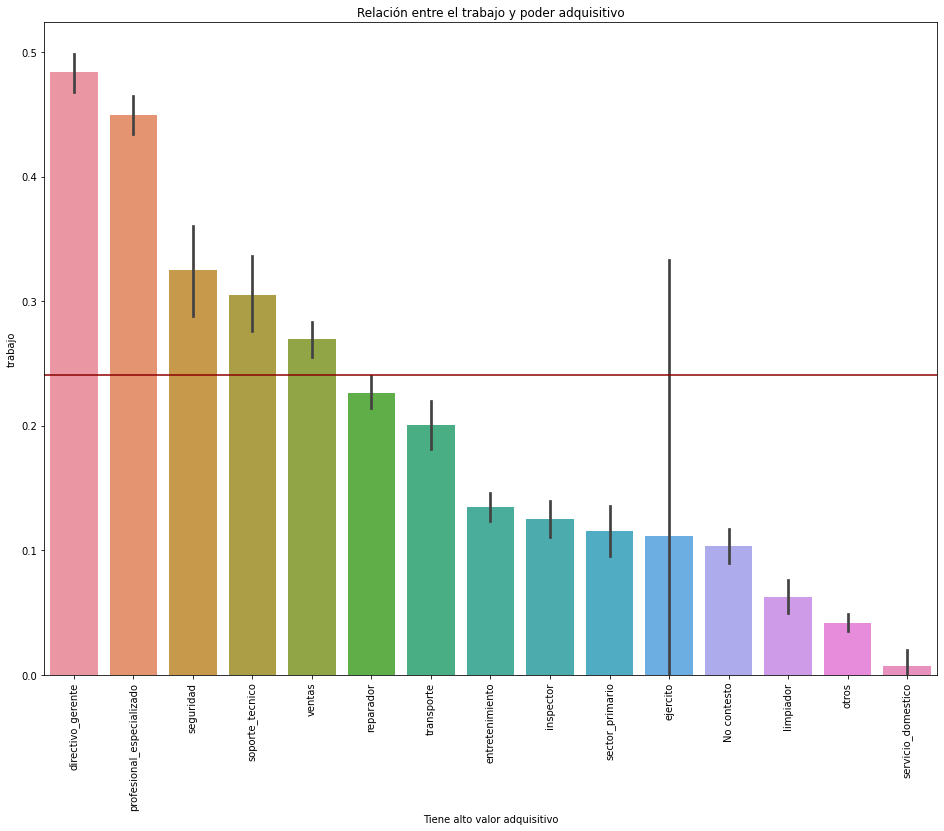

In [2]:
#BARPLOT
plt.figure(figsize=(16, 12))
df_comunas = df[['trabajo', 'tiene_alto_valor_adquisitivo']].copy()
indices = df_comunas.groupby('trabajo')['tiene_alto_valor_adquisitivo'].aggregate(lambda x: np.mean(x))

ax = sns.barplot(
    data=df,
    x='trabajo',
    y='tiene_alto_valor_adquisitivo',
    order= indices.sort_values(ascending=False).index)

plt.ylabel("trabajo")
plt.xlabel("Tiene alto valor adquisitivo")
plt.xticks(rotation=90)
plt.title('Relación entre el trabajo y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

In [3]:
condicion = (df['trabajo'] == 'directivo_gerente') | (df['trabajo'] == 'profesional_especializado') | (df['trabajo'] == 'seguridad') | (df['trabajo'] == 'soporte_tecnico') | (df['trabajo'] == 'ventas')
df[condicion]['tiene_alto_valor_adquisitivo'].value_counts()

0    8129
1    5304
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [4]:
df[condicion]['tiene_alto_valor_adquisitivo'].value_counts().tolist()[1]/df[condicion]['tiene_alto_valor_adquisitivo'].value_counts().sum()

0.3948485074071317

In [5]:
df[condicion]['tiene_alto_valor_adquisitivo'].value_counts().tolist()[1]/df['tiene_alto_valor_adquisitivo'].value_counts().sum()

0.16306453100501123

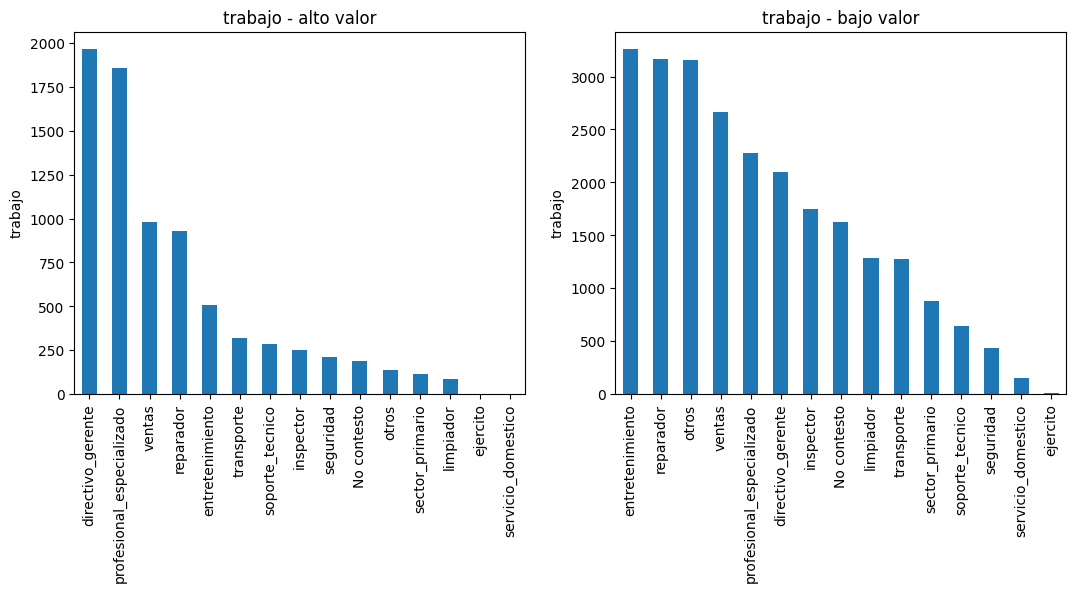

In [6]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_alto_valor = df[df['tiene_alto_valor_adquisitivo'] == 1]
df_bajo_valor = df[df['tiene_alto_valor_adquisitivo'] != 1]

df_alto_valor.trabajo.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("trabajo - alto valor")
axes[0].set_ylabel("trabajo")

df_bajo_valor.trabajo.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("trabajo - bajo valor")
axes[1].set_ylabel("trabajo")

plt.show()

In [7]:
total_alto_valor = df_alto_valor['trabajo'].value_counts().sum()
condicion = (df_alto_valor['trabajo'] == 'directivo_gerente') | (df_alto_valor['trabajo'] == 'profesional_especializado') | (df_alto_valor['trabajo'] == 'ventas') | (df_alto_valor['trabajo'] == 'reparador')
total_buenos_trabajos = df_alto_valor[condicion].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

73.22955212453746

In [8]:
total_general = df['trabajo'].value_counts().sum()
condicion = (df['trabajo'] == 'directivo_gerente') | (df['trabajo'] == 'profesional_especializado') | (df['trabajo'] == 'ventas') | (df['trabajo'] == 'reparador')
total_buenos_trabajos = df[condicion].value_counts().sum()
total_buenos_trabajos/total_general*100

49.05155716789129

### Estado marital vs trabajo

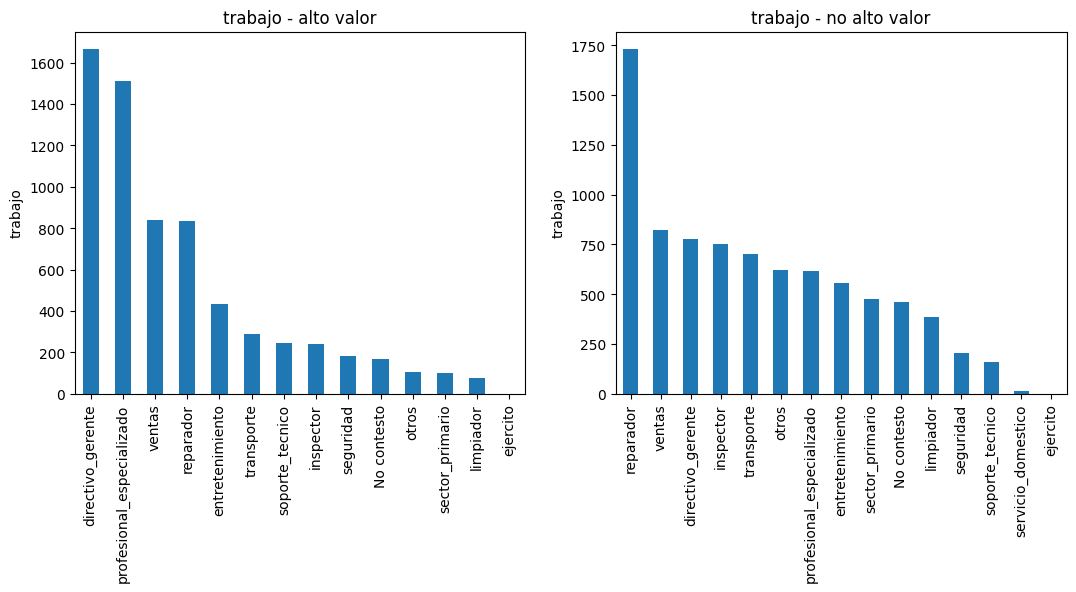

In [9]:
df_matrimonio = df[df['estado_marital'] == 'matrimonio']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_mat_alto_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] == 1]
df_mat_bajo_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] != 1]

df_mat_alto_valor.trabajo.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("trabajo - alto valor")
axes[0].set_ylabel("trabajo")

df_mat_bajo_valor.trabajo.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("trabajo - no alto valor")
axes[1].set_ylabel("trabajo")

plt.show()

In [10]:
total_alto_valor = df_alto_valor['trabajo'].value_counts().sum()
condicion = (df_alto_valor['estado_marital'] == 'matrimonio') & ((df_alto_valor['trabajo'] != 'directivo_gerente') & (df_alto_valor['trabajo'] != 'profesional_especializado') & (df_alto_valor['trabajo'] != 'ventas'))
total_buenos_trabajos = df_alto_valor[condicion].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

34.20951894857726

In [11]:
total_bajo_valor = df_bajo_valor['trabajo'].value_counts().sum()
condicion = (df_bajo_valor['estado_marital'] == 'matrimonio') & ((df_bajo_valor['trabajo'] == 'directivo_gerente') | (df_bajo_valor['trabajo'] == 'profesional_especializado') | (df_bajo_valor['trabajo'] == 'ventas'))
total_buenos_trabajos = df_bajo_valor[condicion].value_counts().sum()
total_buenos_trabajos/total_bajo_valor*100

8.999594977723776

In [12]:
total_general = df_matrimonio['trabajo'].value_counts().sum()
condicion = (df_matrimonio['trabajo'] == 'directivo_gerente') | (df_matrimonio['trabajo'] == 'profesional_especializado') | (df_mat_alto_valor['trabajo'] == 'ventas')
total_buenos_trabajos = df_matrimonio[condicion].value_counts().sum()
total_buenos_trabajos/total_general*100

36.122231118227916

In [13]:
total_buenos_trabajos

5414

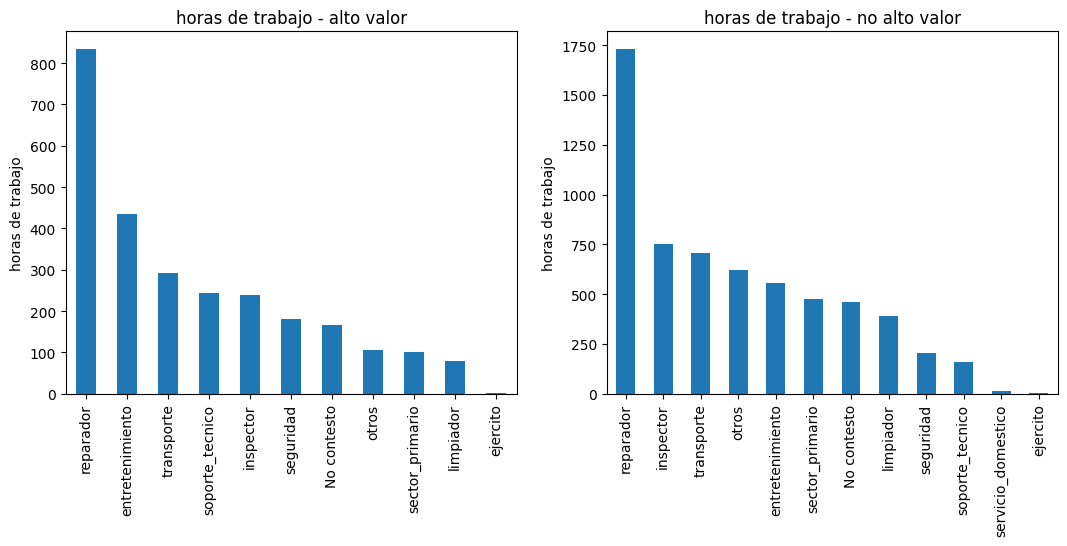

In [14]:
condicion = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_sm_nt = df[(df['estado_marital'] == 'matrimonio') & (condicion)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_nt_alto_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] == 1]
df_sm_nt_bajo_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] != 1]

df_sm_nt_alto_valor.trabajo.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_nt_bajo_valor.trabajo.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

In [15]:
df_sm_nt_alto_valor[df_sm_nt_alto_valor['anios_estudiados'] >= 14.5].value_counts().sum()/df_alto_valor.value_counts().sum() * 100

10.43766747479903

In [17]:
df_sm_nt_bajo_valor[df_sm_nt_bajo_valor['anios_estudiados'] >= 14.5].value_counts().sum()/df_bajo_valor.value_counts().sum() * 100

3.580396921830701

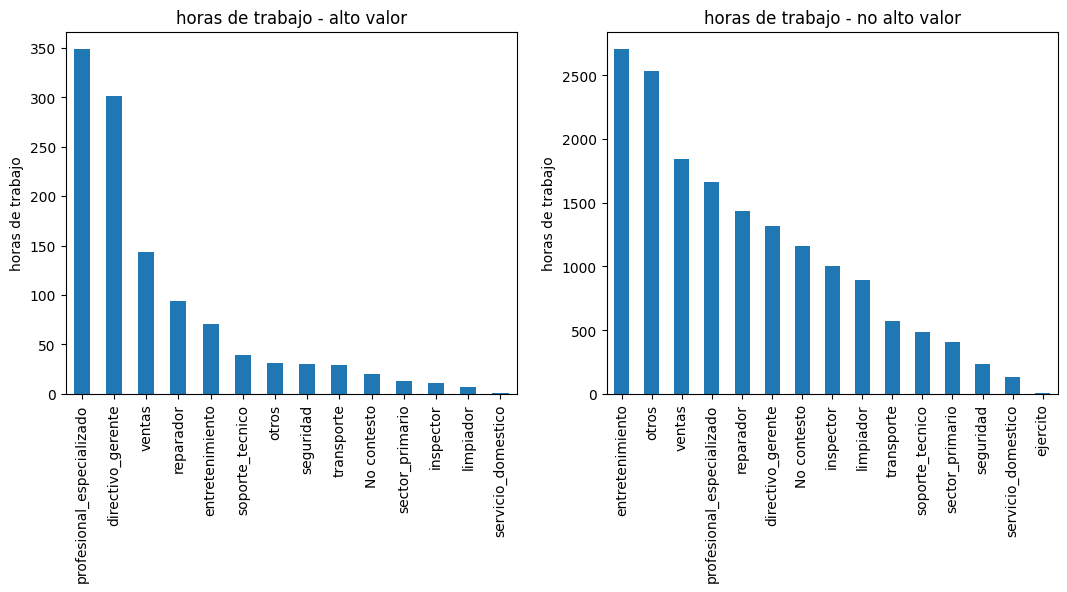

In [19]:
df_nm = df[(df['estado_marital'] != 'matrimonio')]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_nm_alto_valor = df_nm[df_nm['tiene_alto_valor_adquisitivo'] == 1]
df_nm_bajo_valor = df_nm[df_nm['tiene_alto_valor_adquisitivo'] != 1]

df_nm_alto_valor.trabajo.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_nm_bajo_valor.trabajo.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

In [22]:
condicion = (df_nm_alto_valor['trabajo'] == 'directivo_gerente') | (df_nm_alto_valor['trabajo'] == 'profesional_especializado')
df_nm_alto_valor[condicion].value_counts().sum()/df_alto_valor.value_counts().sum() * 100

8.293990047211944

In [23]:
condicion = (df_nm_bajo_valor['trabajo'] == 'directivo_gerente') | (df_nm_bajo_valor['trabajo'] == 'profesional_especializado') 
df_nm_bajo_valor[condicion].value_counts().sum()/df_bajo_valor.value_counts().sum() * 100

12.077764277035238

In [24]:
from sklearn.metrics import accuracy_score
def baseline(df):
    df = df.reset_index()
    pred = pd.Series(np.zeros(len(df)))
    condicion = (df['trabajo'] == 'directivo_gerente') | (df['trabajo'] == 'profesional_especializado') | (df['trabajo'] == 'ventas')
    condicion_negada = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
    sos_casado_y_sos_director = (df['estado_marital'] == 'matrimonio') & condicion
    sos_casado_y_no_sos_director_y_si_estudiaste__mas_14_anios = (df['estado_marital'] == 'matrimonio') & (condicion_negada) & (df['anios_estudiados'] >= 14.5)
    tenes_mucha_ganancia = df['ganancia_pe'] >= 7000
    pred[tenes_mucha_ganancia | sos_casado_y_sos_director | sos_casado_y_no_sos_director_y_si_estudiaste__mas_14_anios ] = 1
    return pred.tolist()


In [25]:
accuracy_score(df.tiene_alto_valor_adquisitivo, pred)

NameError: name 'pred' is not defined

In [26]:
np.mean(df['tiene_alto_valor_adquisitivo'] == baseline(df))

KeyError: 'ganancia'